In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix


In [2]:
img_rows=384
img_cols=256

In [3]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/dataset'
data_dir_list = os.listdir(data_path)

In [4]:
img_list=[]
classnames = []
def make_img_data():
	for dataset in data_dir_list:
		img_dir=os.listdir(data_path+'/'+ dataset)
		classnames.append(dataset)
		for img in img_dir:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
			img_list.append(input_img_resize)
	img_data = np.array(img_list)
	img_data = img_data.astype('float32')
	return img_data
img_data = make_img_data()


In [5]:
num_classes=10
num_of_samples = img_data.shape[0]
label = np.ones((num_of_samples,),dtype='int64')
label[0:100]=0
label[100:200]=1
label[200:300]=2
label[300:400]=3
label[400:500]=4
label[500:600]=5
label[600:700]=6
label[700:800]=7
label[800:900]=8
label[900:1000]=9


In [6]:
X_train, X_test, y_train, y_test = train_test_split(img_data, label, test_size=0.2)

In [7]:
def lbp(image, r, p):
  

  rows, cols = image.shape
  lbp_image = np.zeros_like(image)

  for i in range(r, rows - r):
    for j in range(r, cols - r):
      selected_pix = image[i, j]
      binary_code = 0

      for n in range(p):
        x = int(i - r * np.cos(2 * np.pi * n / p))
        y = int(j - r * np.sin(2 * np.pi * n / p))
        if 0 <= x < rows and 0 <= y < cols:
          neighbor_pixel = image[x, y]
          if neighbor_pixel >= selected_pix:
            binary_code += 2 ** n

      lbp_image[i, j] = binary_code

  return lbp_image

In [8]:

def extract_lbp(images , P = 8 , R = 1):
    lbps = []
    for image in (images):
        lbp = local_binary_pattern(image, P, R)
        lbps.append(lbp)
    
    return np.array(lbps)

In [9]:
x_lbp_training  = extract_lbp(X_train)
x_lbp_testing =  extract_lbp(X_test)

c:\Users\bansa\Desktop\ee673\assignment 1\vir_env\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


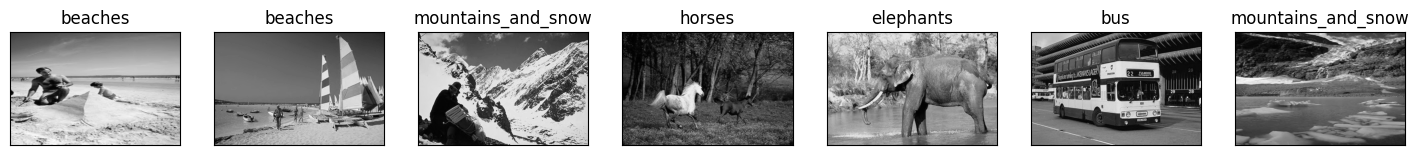

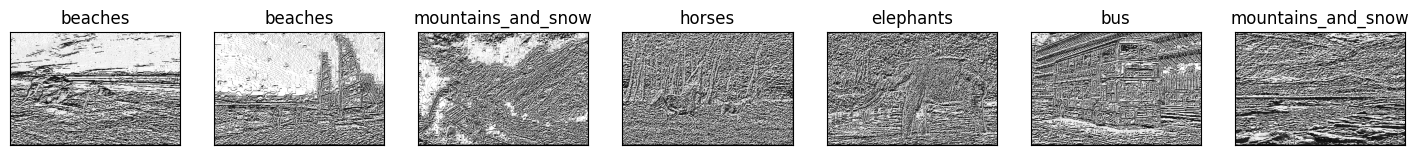

In [ ]:
def display_images_with_classes(images, classes, start_idx=0):
    fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(18, 2.5))

    idx = start_idx
    for i in range(7):
        axes[i].imshow(images[idx], cmap='gray')
        axes[i].set_title(classnames[classes[idx]])
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
        idx += 1
    plt.show()

display_images_with_classes(X_train, y_train)
display_images_with_classes(x_lbp_training, y_train)


In [ ]:
def create_histograms(images, rows, cols, bins_per_sub_images):
    all_histograms = []

    for image in images:
        sub_image_histograms = []

        row_step = image.shape[0] // rows
        col_step = image.shape[1] // cols

        for i in range(rows):
            for j in range(cols):
                sub_image = image[i * row_step: (i + 1) * row_step, j * col_step: (j + 1) * col_step]

                sub_image_histogram = np.histogram(sub_image, bins=bins_per_sub_images)[0]
                sub_image_histograms.append(sub_image_histogram)

        histogram = np.array(sub_image_histograms).flatten()
        all_histograms.append(histogram)

    return np.array(all_histograms)

In [ ]:
X_train_hist = create_histograms(x_lbp_training, rows=4,cols = 6 , bins_per_sub_images=64)
X_test_hist = create_histograms(x_lbp_testing, rows=4, cols = 6 , bins_per_sub_images=64)

In [ ]:
X_test_hist.shape

(200, 1536)

In [ ]:
def train_knn_model(k):
    model_knn = KNeighborsClassifier(n_neighbors=k, p=1)
    model_knn.fit(X_train_hist, y_train)

    train_acc = model_knn.score(X_train_hist, y_train)
    test_acc = model_knn.score(X_test_hist, y_test)

    return train_acc, test_acc

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3 ,p = 1)
model_knn.fit(X_train_hist, y_train)

print('Training accuracy of KNN\t:', model_knn.score(X_train_hist, y_train))
print('Testing accuracy of KNN\t:', model_knn.score(X_test_hist, y_test))

Training accuracy of KNN	: 0.81125
Testing accuracy of KNN	: 0.625


In [ ]:
k_values = list(range(1, 200, 2))

train_accuracies = []
test_accuracies = []

for k in k_values:
    train_acc, test_acc = train_knn_model(k)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)



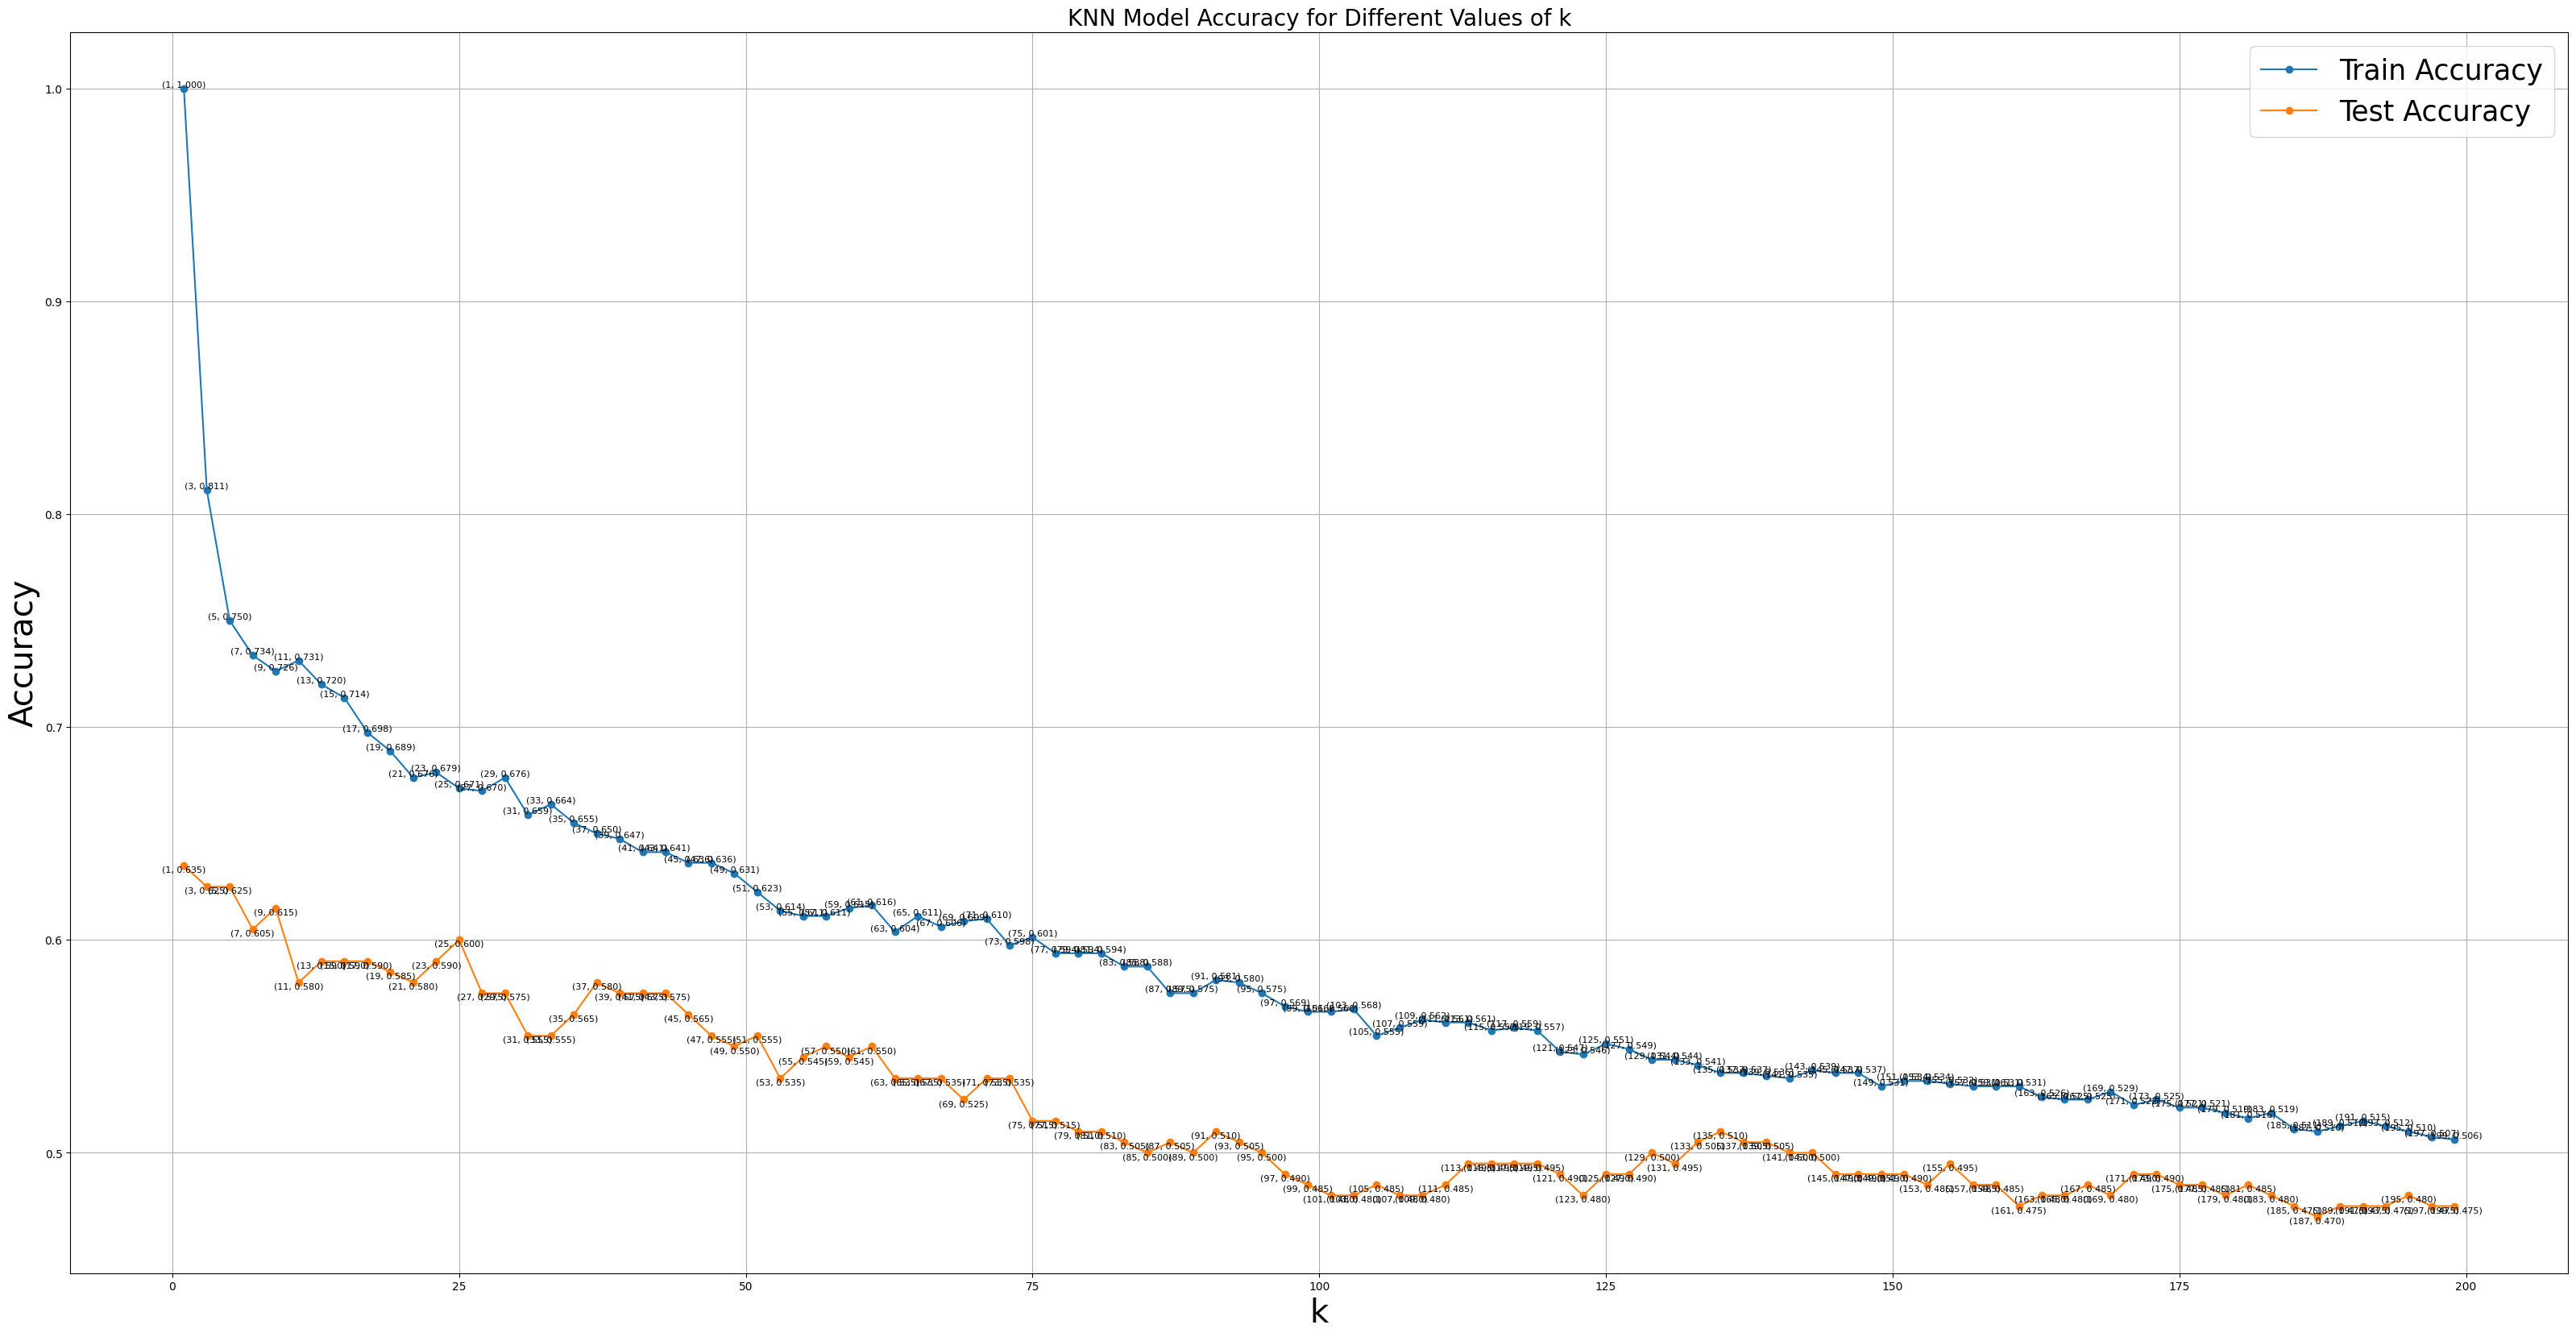

In [ ]:
plt.figure(figsize=(40, 20))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('KNN Model Accuracy for Different Values of k', fontsize=20)
plt.xlabel('k', fontsize=29)
plt.ylabel('Accuracy', fontsize=29)
plt.legend(fontsize=25)
plt.grid(True)

# Add annotations for each point with adjusted size and spacing
label_size = 8
spacing = 8
for k, train_acc, test_acc in zip(k_values, train_accuracies, test_accuracies):
    plt.text(k, train_acc, f'({k}, {train_acc:.3f})', ha='center', va='bottom', fontsize=label_size)
    plt.text(k, test_acc, f'({k}, {test_acc:.3f})', ha='center', va='top', fontsize=label_size)

# Save the plot as a PNG file
plt.savefig('knn_accuracy_plot.png')

# Show the plot
plt.show()

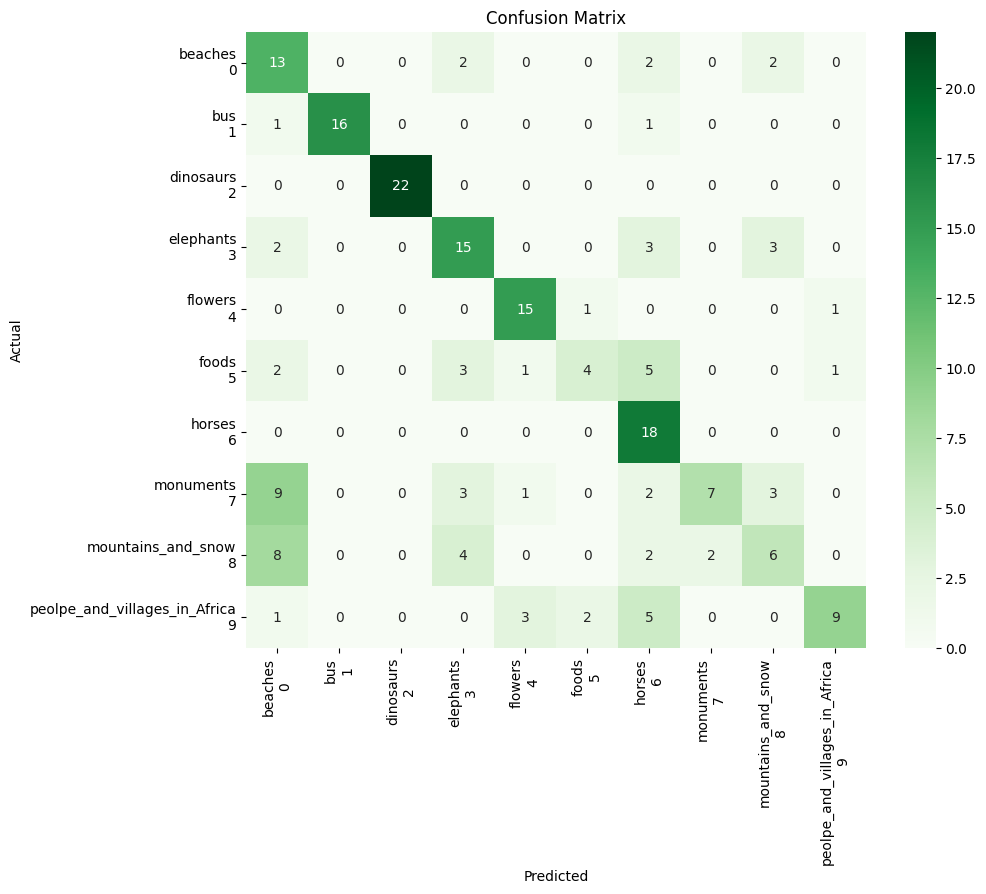

In [ ]:


# Predictions on the test set
y_pred = model_knn.predict(X_test_hist)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=True)
tick_labels = [f"{classnames[label]}\n{label}" for label in range(len(classnames))]
plt.xticks(ticks=[i + 0.5 for i in range(len(classnames))], labels=tick_labels, rotation=90, ha='center')
plt.yticks(ticks=[i + 0.5 for i in range(len(classnames))], labels=tick_labels, rotation=0, va='center')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix.png')

plt.show()

In [ ]:
def get_neighbours(i):
    distances, indices = model_knn.kneighbors(X_test_hist[i].reshape(1,-1))
    neighbour_img = []
    for j in indices[0]:
        neighbour_img.append(X_train[j])
    return neighbour_img
# model_knn.predict(X_test_hist[0])


In [ ]:
k_nearest_neighbour_img = {}
for i in range(len(X_test_hist)):
    v = get_neighbours(i) 
    k_nearest_neighbour_img[i] = v

In [ ]:
k_nearest_neighbour_img

{0: [array([[ 24., 108.,  98., ...,  58.,  30.,  46.],
         [ 24., 108.,  99., ..., 122.,  61.,  25.],
         [ 25., 111., 107., ..., 146., 105.,  47.],
         ...,
         [ 30., 158., 147., ...,  94.,  98.,  94.],
         [ 25., 141., 145., ...,  97.,  98.,  93.],
         [ 29., 176., 161., ..., 109., 104.,  91.]], dtype=float32),
  array([[ 28., 144., 169., ..., 103.,  10.,  54.],
         [ 29., 145., 166., ...,  19.,   9.,  52.],
         [ 31., 146., 163., ...,  19.,  20.,  14.],
         ...,
         [  9.,  29.,  78., ...,  17.,  17.,  17.],
         [  9.,  27.,  72., ...,  17.,  17.,  17.],
         [  9.,  27.,  68., ...,  17.,  17.,  17.]], dtype=float32),
  array([[65., 60., 71., ..., 16., 16., 16.],
         [63., 59., 64., ..., 11., 11., 11.],
         [62., 69., 75., ...,  7.,  7.,  7.],
         ...,
         [ 8.,  8.,  9., ..., 12., 12., 12.],
         [ 8.,  8.,  9., ...,  6.,  6.,  6.],
         [ 8.,  8.,  9., ...,  9.,  9., 10.]], dtype=float32)],
 1:

In [ ]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_frequency_map = dict(zip(unique_classes, class_counts))
class_frequency_map

{0: 81, 1: 82, 2: 78, 3: 77, 4: 83, 5: 84, 6: 82, 7: 75, 8: 78, 9: 80}

In [ ]:
# Calculate precision and recall for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

# Print precision and recall for each class
for class_idx, (prec, rec) in enumerate(zip(precision_per_class, recall_per_class)):
    print(f"Class {classnames[class_idx]}: Precision = {prec:.4f}, Recall = {rec:.4f}")

# Calculate overall precision and recall
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')

print("\nWeighted Average Precision:", weighted_precision)
print("Weighted Average Recall:", weighted_recall)

Class beaches: Precision = 0.3611, Recall = 0.6842
Class bus: Precision = 1.0000, Recall = 0.8889
Class dinosaurs: Precision = 1.0000, Recall = 1.0000
Class elephants: Precision = 0.5556, Recall = 0.6522
Class flowers: Precision = 0.7500, Recall = 0.8824
Class foods: Precision = 0.5714, Recall = 0.2500
Class horses: Precision = 0.4737, Recall = 1.0000
Class monuments: Precision = 0.7778, Recall = 0.2800
Class mountains_and_snow: Precision = 0.4286, Recall = 0.2727
Class peolpe_and_villages_in_Africa: Precision = 0.8182, Recall = 0.4500

Weighted Average Precision: 0.6764735702893597
Weighted Average Recall: 0.625
